In [180]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [181]:
df = pd.read_csv('inequality_class_final.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          205 non-null    object 
 1   federalism_GT                    202 non-null    float64
 2   id                               69 non-null     float64
 3   region_wb                        69 non-null     object 
 4   gdp                              69 non-null     float64
 5   statehiste1500_02n               159 non-null    float64
 6   origtime2                        158 non-null    float64
 7   eleva                            193 non-null    float64
 8   avg_temp                         197 non-null    float64
 9   Maddison_gdppc_1990_estimate_ln  194 non-null    float64
 10  lp_lat_abst_fill                 200 non-null    float64
 11  mountains                        196 non-null    float64
 12  log_ocdistance_new    

 go ahead and drop variables that are not needed - name and region are not quantitative and we dont necessarily want to use each country to map to its respective income inequality


 
Country name, regional dummy, id


may drop gdp bc there are so few entries for it
when gdp is not dropped then there are 52 non null entries
when gdp is dropped then there are 122 entries 

this is a 142% increase in the number of entries.

**I will drop gdp and see how it goes.** 

In [182]:
df = df.drop(columns=['country','region_wb','id','gdp'])
df.head()

,federalism_GT,statehiste1500_02n,origtime2,eleva,avg_temp,Maddison_gdppc_1990_estimate_ln,lp_lat_abst_fill,mountains,log_ocdistance_new,rugged,...,sd_emeanclip,Urbanpopulationoftotalpop,dist2suitable_km_new,Ygini_disp,Fixedtelephonesubscriptionsp,Employmentinagricultureof,Accesstoelectricityofpopu,pln_sxHr_mean,agyears_ext,popd_1500AD
0,2.0,0.311557,15000.0,1076.740352,21.6,9.079312,0.255556,0.455154,2.952231,1.732390,...,0.776437,76.920,191207.98,46.400002,18.318046,13.790000,98.110626,2626.828031,4100.0,12.078997
1,0.0,NaN,NaN,184.250987,26.0,8.904918,0.044444,0.048973,4.338826,0.306818,...,0.133851,66.547,175987.63,45.799999,16.041285,8.460000,94.783394,6696.253076,1500.0,0.057579
2,0.0,0.124440,8000.0,359.346328,3.6,10.248469,0.688889,0.190206,4.567989,0.715470,...,0.248912,84.588,108188.94,25.000000,60.024409,2.250000,100.000000,0.000000,5500.0,0.842480
3,2.0,0.358282,45000.0,1317.581088,7.0,10.436217,0.522222,0.938316,5.708037,4.761175,...,0.625552,73.530,358067.16,29.900000,65.373435,4.000000,100.000000,877.940256,5500.0,19.928775
4,0.0,0.082024,135000.0,208.329245,27.6,7.401412,0.088889,0.016055,4.321187,0.227549,...,0.074167,48.669,351368.59,43.000000,1.639566,53.939999,56.975372,6889.873359,3500.0,7.670432


drop empty cells, check how much data is left

In [183]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122 entries, 0 to 204
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   federalism_GT                    122 non-null    float64
 1   statehiste1500_02n               122 non-null    float64
 2   origtime2                        122 non-null    float64
 3   eleva                            122 non-null    float64
 4   avg_temp                         122 non-null    float64
 5   Maddison_gdppc_1990_estimate_ln  122 non-null    float64
 6   lp_lat_abst_fill                 122 non-null    float64
 7   mountains                        122 non-null    float64
 8   log_ocdistance_new               122 non-null    float64
 9   rugged                           122 non-null    float64
 10  tropical                         122 non-null    float64
 11  pmean                            122 non-null    float64
 12  irri_impact5          

In [184]:
vars = ['federalism_GT',
 'statehiste1500_02n',
 'origtime2',
 'eleva',
 'avg_temp',
 'Maddison_gdppc_1990_estimate_ln',
 'lp_lat_abst_fill',
 'mountains',
 'log_ocdistance_new',
 'rugged',
 'tropical',
 'pmean',
 'irri_impact5',
 'frstdays',
 'sd_emeanclip',
 'Urbanpopulationoftotalpop',
 'dist2suitable_km_new',
 'Fixedtelephonesubscriptionsp',
 'Employmentinagricultureof',
 'Accesstoelectricityofpopu',
 'pln_sxHr_mean',
 'agyears_ext',
 'popd_1500AD']




(array([14., 12., 17., 22., 23., 20.,  6.,  4.,  2.,  2.]),
 array([23.5, 27.8, 32.1, 36.4, 40.7, 45. , 49.3, 53.6, 57.9, 62.2, 66.5]),
 <BarContainer object of 10 artists>)

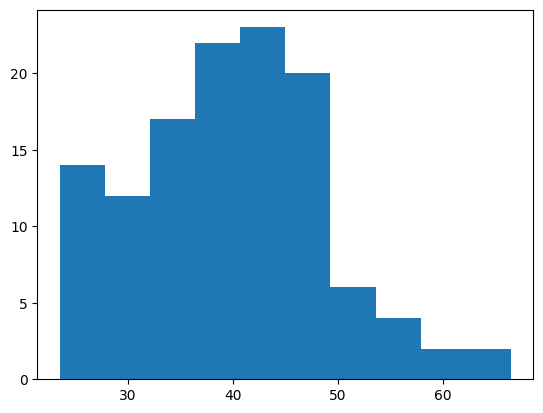

In [185]:
x = df.loc[:, vars].values
y = df.loc[:, 'Ygini_disp'].values

x_norm = StandardScaler().fit_transform(x)

plt.hist(y) 

y var is somewhat gaussian but still skewed

In [186]:
def numPCA(x,v):
    pca = PCA(.90)
    model = pca.fit(StandardScaler().fit_transform(x))
    n_pcs = pca.n_components_
        # LIST COMPREHENSION HERE
    most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
    #print(model.components_)
    initial_feature_names = v
    # get the names
    most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

    # LIST COMPREHENSION HERE AGAIN
    dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

    # build the dataframe
    df2 = pd.DataFrame(dic.items())
    print (n_pcs)
    print (pca.explained_variance_ratio_)
    #print(df2)
    return  df2

vpass =[]
for i in df.columns.tolist():
    if ('td') in i:
        vpass.append(i)

In [187]:
numPCA(x_norm,vars)

9
[0.35194906 0.1761922  0.1129949  0.07162949 0.06046289 0.05405266
 0.03455206 0.02345954 0.02076555]


,0,1
0,PC0,lp_lat_abst_fill
1,PC1,eleva
2,PC2,pmean
3,PC3,statehiste1500_02n
4,PC4,federalism_GT
5,PC5,popd_1500AD
6,PC6,federalism_GT
7,PC7,popd_1500AD
8,PC8,federalism_GT
